# Pre-processing

In [2]:
##Reading the file available on https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones/data
import pandas as pd
filepath = "C:/Users/Niharika/Desktop/Text Mining/"
df = pd.read_csv(filepath+"Amazon_Unlocked_Mobile.csv")
apple = df[df['Brand Name']=='Apple']

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
import string

stopwords = set(stopwords.words('english'))
punctuation =set(string.punctuation)
lemmatize = WordNetLemmatizer()

def cleaning(article):
    article = str(article)
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
print(stopwords)

{'at', 'when', "you're", 'can', 'themselves', 'from', 'then', 'why', 'more', 'just', 'weren', 'should', 'all', 'the', "aren't", 'she', 'those', 'and', 'was', 'll', 'is', 'after', 'what', "needn't", 'm', 'him', 'no', 'are', 'you', "she's", 'some', 'we', 'do', 'ain', 'hers', 'as', 'through', "couldn't", 'does', 'before', 'down', 'he', 'under', 'over', 'yourselves', 'but', 'will', 'me', 'to', 'his', 't', 'few', 'further', 'myself', 'having', 'hasn', "haven't", 'couldn', 'isn', 'own', "didn't", 'between', 's', "shouldn't", 'her', "it's", 'y', 'them', 'wasn', 'yourself', 'did', 'once', 'it', 'on', 'itself', 'am', 'so', 'now', 'if', 'not', 'too', 'a', 've', 'hadn', 'shouldn', 'your', 'for', 'here', 'until', 'haven', 'such', 'didn', 'have', 'nor', 're', "doesn't", "mustn't", 'an', 'ma', 'our', 'o', 'won', 'same', 'yours', "hadn't", 'off', 'of', "that'll", 'in', 'ours', 'very', 'its', 'whom', 'mustn', 'been', 'most', "hasn't", "isn't", 'being', 'has', 'below', 'into', "weren't", 'mightn', "sho

In [5]:
for i, j in enumerate(apple['Reviews'].head(5)):print(i,j)

0 Was a gift for my husband and he loves it. Replaced a first gen droid so there was no place to go but up.The phone came in a plain white box with charging cable. It looked brand new and unused.So far it has performed as a new phone with no troubles whatsoever.
1 Great price, extremely fast shipping works as advertized!
2 Moving from Android to Apple...my kids have this phone too and keep me straight on using it. Phone is superb and, while Apple has its moments, it is intuitive to use. Seller was VERY responsive...only reason not a 5 star is "new" phone had been opened for imei verification. Not sure that's industry standard. If it is, seller is 5 star.
3 It is compatible with Verizon. Not pink but PEACH, pretty beaten up...but not bad enough to return. A descent value for anyone who doesn't want to spend a fortune on a phone!
4 I love this phone! Thank you so much.


In [6]:
ap_text = apple['Reviews'].apply(cleaning)

In [7]:
for i,j in enumerate(ap_text.head(5)): print(i,j)

0 gift husband love it replaced first gen droid place go upthe phone came plain white box charging cable looked brand new unusedso far performed new phone trouble whatsoever
1 great price extremely fast shipping work advertized
2 moving android applemy kid phone keep straight using it phone superb and apple moment intuitive use seller responsiveonly reason 5 star new phone opened imei verification sure thats industry standard is seller 5 star
3 compatible verizon pink peach pretty beaten upbut bad enough return descent value anyone want spend fortune phone
4 love phone thank much


In [8]:
ap_text_list = [i.split() for i in ap_text]

In [9]:
for i in ap_text_list[:5]: print(i)

['gift', 'husband', 'love', 'it', 'replaced', 'first', 'gen', 'droid', 'place', 'go', 'upthe', 'phone', 'came', 'plain', 'white', 'box', 'charging', 'cable', 'looked', 'brand', 'new', 'unusedso', 'far', 'performed', 'new', 'phone', 'trouble', 'whatsoever']
['great', 'price', 'extremely', 'fast', 'shipping', 'work', 'advertized']
['moving', 'android', 'applemy', 'kid', 'phone', 'keep', 'straight', 'using', 'it', 'phone', 'superb', 'and', 'apple', 'moment', 'intuitive', 'use', 'seller', 'responsiveonly', 'reason', '5', 'star', 'new', 'phone', 'opened', 'imei', 'verification', 'sure', 'thats', 'industry', 'standard', 'is', 'seller', '5', 'star']
['compatible', 'verizon', 'pink', 'peach', 'pretty', 'beaten', 'upbut', 'bad', 'enough', 'return', 'descent', 'value', 'anyone', 'want', 'spend', 'fortune', 'phone']
['love', 'phone', 'thank', 'much']


## Building a Word Cloud

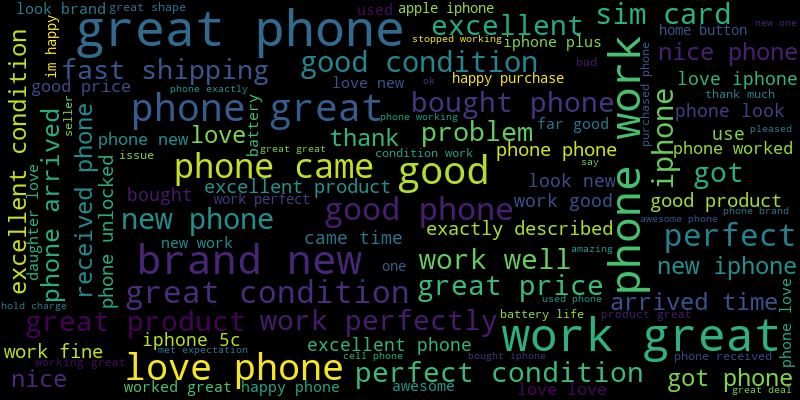

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size = 50, width = 800, height = 400, max_words = 100)
image = wordcloud.generate(ap_text.to_string()).to_image()
image

In [11]:
import numpy as np
from PIL import Image
mask = np.array(Image.open(filepath+'shape.jpg'))

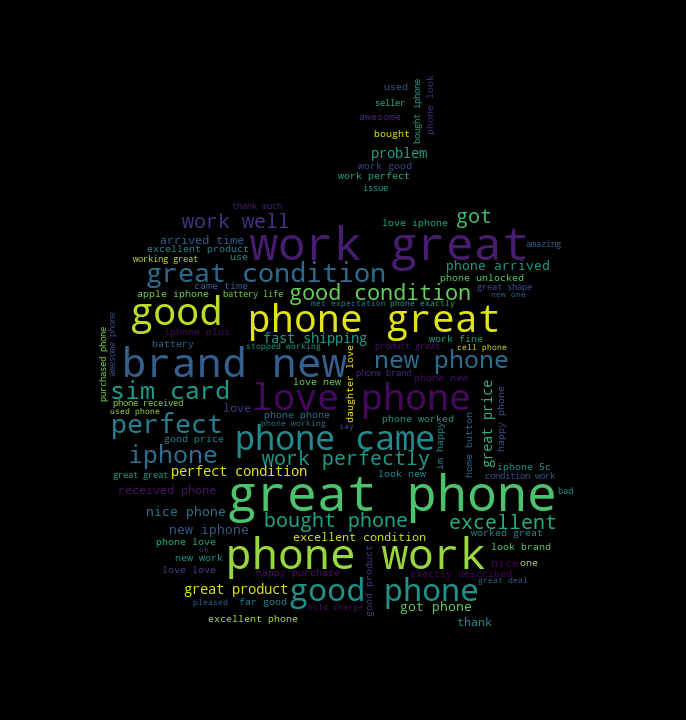

In [12]:
wordcloud2 = WordCloud(max_font_size=50, width=600, height=600, max_words=100, mask=mask)
image2 = wordcloud2.generate(ap_text.to_string()).to_image()
image2

# TF-IDF

In [13]:
apple.head(3)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
3081,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,Was a gift for my husband and he loves it. Rep...,5.0
3082,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,"Great price, extremely fast shipping works as ...",1.0
3083,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,Moving from Android to Apple...my kids have th...,1.0


In [14]:
apple = apple.fillna('')

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [18]:
sparse = tfidf.fit_transform(apple['Reviews'])
sparse
print (sparse)

  (0, 11090)	0.131360974471
  (0, 4587)	0.149039166933
  (0, 4322)	0.0771728093347
  (0, 6736)	0.0745663275535
  (0, 5167)	0.187408141392
  (0, 879)	0.1114797694
  (0, 4945)	0.145201834635
  (0, 6216)	0.142608413065
  (0, 5656)	0.154658976158
  (0, 8457)	0.162477736174
  (0, 4230)	0.128346116235
  (0, 4552)	0.25771876239
  (0, 3453)	0.234400364675
  (0, 9404)	0.180985801624
  (0, 10181)	0.121978639401
  (0, 6882)	0.185544759919
  (0, 7544)	0.18640187556
  (0, 10330)	0.0664824452476
  (0, 4651)	0.138471416485
  (0, 1805)	0.0791700766249
  (0, 10774)	0.11323961566
  (0, 10161)	0.0540811161425
  (0, 7473)	0.106225184797
  (0, 1879)	0.101197368246
  (0, 5307)	0.0746180148461
  :	:
  (58184, 1642)	0.142409265947
  (58184, 5591)	0.108493028014
  (58184, 6151)	0.190470680695
  (58184, 6637)	0.169506682672
  (58184, 2060)	0.152998232609
  (58184, 8143)	0.230332378334
  (58184, 11218)	0.213326693089
  (58184, 7517)	0.241360820391
  (58184, 2587)	0.2380517397
  (58184, 2809)	0.324888159672
  (58

# NMF

In [19]:
from sklearn.decomposition import NMF
nmf = NMF(5)
nmf

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [21]:
nmf_data = nmf.fit_transform(sparse)
nmf_data.shape

(58186, 5)

In [22]:
pd.DataFrame(nmf_data).head()

,0,1,2,3,4
0,0.042856,0.000000,0.000418,0.000000,0.006661
1,0.004912,0.001704,0.042087,0.001361,0.000000
2,0.043506,0.002037,0.000080,0.000000,0.003295
3,0.025002,0.000000,0.000000,0.000000,0.000000
4,0.013750,0.002130,0.004111,0.002403,0.063043
